# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Ferdian Sakti
- **Email:** ferdian@smkdb1jombang.sch.id
- **ID Dicoding:** ferdian_sakti

## Menentukan Pertanyaan Bisnis

1. Bagaimana pola penyewaan sepeda bervariasi antara pengguna kasual (biasa) dan terdaftar berdasarkan jumlah transaksi dalam periode tertentu?
2. Bagaimana distribusi dan perbedaan rata-rata penyewaan sepeda (cnt) antara hari kerja dan hari libur dalam periode tertentu berdasarkan data historis?
3. Bagaimana hubungan antara suhu, kelembapan, dan kecepatan angin dengan jumlah penyewaan sepeda berdasarkan data historis?

## Import Semua Packages/Library yang Digunakan

In [51]:
# Mengimpor pustaka yang diperlukan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

## Data Wrangling

### Gathering Data

In [52]:
# Memuat dataset
data_sepeda = pd.read_csv('/content/sample_data/hour.csv')

In [53]:
# Menampilkan beberapa baris pertama dataset
print(data_sepeda.head())

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


In [54]:
# Memeriksa dimensi dataset
print("Ukuran dataset:", data_sepeda.shape)

Ukuran dataset: (17379, 17)


**Insight:**
- Dataset berupa file csv dengan nama file hour.csv untuk dianalisis.
- Dataset memiliki 17.379 baris dan 17 kolom.

### Assessing Data

In [55]:
# Menampilkan ringkasan dataset
print(data_sepeda.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None


In [56]:
# Memeriksa nilai yang hilang
print("Nilai yang hilang:\n", data_sepeda.isna().sum())

Nilai yang hilang:
 instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [57]:
# Memeriksa baris yang duplikat
print("Jumlah baris duplikat:", data_sepeda.duplicated().sum())

Jumlah baris duplikat: 0


**Insight:**
- Tidak terdapat missing value dan duplikat value pada dataset yang diimpor.
- Dataset memiliki 4 kolom bertipe float64, 12 kolom bertipe int64, dan
1 kolom bertipe object, yang biasanya berisi teks atau kategori.

### Cleaning Data

In [58]:
# Mengkonversi kolom dteday
data_sepeda['dteday'] = pd.to_datetime(data_sepeda['dteday'])

In [59]:
# Mengubah kolom 'season' menjadi kategori
peta_musim = {1: 'Semi', 2: 'Panas', 3: 'Gugur', 4: 'Dingin'}
data_sepeda['season'] = data_sepeda['season'].map(peta_musim)

In [60]:
# Mengubah kolom 'mnth' menjadi kategori
peta_bulan = {1: 'Januari', 2: 'Februari', 3: 'Maret', 4: 'April', 5: 'Mei', 6: 'Juni',
              7: 'Juli', 8: 'Agustus', 9: 'September', 10: 'Oktober', 11: 'November', 12: 'Desember'}
data_sepeda['mnth'] = data_sepeda['mnth'].map(peta_bulan)

In [61]:
# Mengubah kolom 'weekday' menjadi kategori
peta_hari = {0: 'Minggu', 1: 'Senin', 2: 'Selasa', 3: 'Rabu',
             4: 'Kamis', 5: 'Jumat', 6: 'Sabtu'}
data_sepeda['weekday'] = data_sepeda['weekday'].map(peta_hari)

In [62]:
# Menggabungkan data ke penyewaan harian
penyewaan_harian = data_sepeda.groupby(['dteday', 'workingday', 'holiday'])['cnt'].sum().reset_index()

In [63]:
# Memeriksa kolom workingday memiliki nilai kategori yang sesuai (0 dan 1)
print(penyewaan_harian['workingday'].unique())

[0 1]


In [64]:
# Kategorisasi suhu
temp_bins = np.linspace(data_sepeda['temp'].min(), data_sepeda['temp'].max(), 4)
temp_labels = ['Dingin', 'Sedang', 'Panas']
data_sepeda['kategori_suhu'] = pd.cut(data_sepeda['temp'], bins=temp_bins, labels=temp_labels)

In [65]:
# Kategorisasi kelembapan
humidity_bins = np.linspace(data_sepeda['hum'].min(), data_sepeda['hum'].max(), 4)
humidity_labels = ['Rendah', 'Sedang', 'Tinggi']
data_sepeda['kategori_kelembapan'] = pd.cut(data_sepeda['hum'], bins=humidity_bins, labels=humidity_labels)

In [66]:
# Kategorisasi kecepatan angin
wind_bins = np.linspace(data_sepeda['windspeed'].min(), data_sepeda['windspeed'].max(), 4)
wind_labels = ['Tenang', 'Sejuk', 'Berangin']
data_sepeda['kategori_angin'] = pd.cut(data_sepeda['windspeed'], bins=wind_bins, labels=wind_labels)

In [67]:
# Kategorisasi waktu dalam sehari
jam_bins = [0, 6, 12, 18, 24]
jam_labels = ['Dini Hari', 'Pagi', 'Siang', 'Malam']
data_sepeda['waktu_hari'] = pd.cut(data_sepeda['hr'], bins=jam_bins, labels=jam_labels, right=False)

In [68]:
# Kategorisasi jumlah penyewaan sepeda
rental_bins = np.linspace(data_sepeda['cnt'].min(), data_sepeda['cnt'].max(), 4)
rental_labels = ['Rendah', 'Sedang', 'Tinggi']
data_sepeda['kategori_sewa'] = pd.cut(data_sepeda['cnt'], bins=rental_bins, labels=rental_labels)

In [69]:
# Simpan DataFrame ke file CSV
data_sepeda.to_csv('data_sepeda_cleaned.csv', index=False)

**Insight:**
- Mengubah data numerik menjadi kategori pada variabel musim.
- Membantu eksplorasi dengan mengubah variabel kontinu menjadi kategori.

## Exploratory Data Analysis (EDA)

### Explore data hour.csv

In [70]:
# Menampilkan statistik dasar untuk variabel kontinu
print(data_sepeda[['casual', 'registered', 'cnt']].describe())

             casual    registered           cnt
count  17379.000000  17379.000000  17379.000000
mean      35.676218    153.786869    189.463088
std       49.305030    151.357286    181.387599
min        0.000000      0.000000      1.000000
25%        4.000000     34.000000     40.000000
50%       17.000000    115.000000    142.000000
75%       48.000000    220.000000    281.000000
max      367.000000    886.000000    977.000000


In [71]:
# Menampilkan jumlah kategori pada variabel kategorikal
kolom_kategorikal = ['season', 'yr', 'mnth', 'weekday', 'weathersit', 'kategori_suhu',
                     'kategori_angin', 'kategori_kelembapan', 'waktu_hari', 'kategori_sewa']
for kolom in kolom_kategorikal:
    print(f"Jumlah nilai untuk {kolom}:\n{data_sepeda[kolom].value_counts()}\n")

Jumlah nilai untuk season:
season
Gugur     4496
Panas     4409
Semi      4242
Dingin    4232
Name: count, dtype: int64

Jumlah nilai untuk yr:
yr
1    8734
0    8645
Name: count, dtype: int64

Jumlah nilai untuk mnth:
mnth
Juli         1488
Mei          1488
Desember     1483
Agustus      1475
Maret        1473
Oktober      1451
Juni         1440
April        1437
September    1437
November     1437
Januari      1429
Februari     1341
Name: count, dtype: int64

Jumlah nilai untuk weekday:
weekday
Sabtu     2512
Minggu    2502
Jumat     2487
Senin     2479
Rabu      2475
Kamis     2471
Selasa    2453
Name: count, dtype: int64

Jumlah nilai untuk weathersit:
weathersit
1    11413
2     4544
3     1419
4        3
Name: count, dtype: int64

Jumlah nilai untuk kategori_suhu:
kategori_suhu
Sedang    8885
Dingin    4753
Panas     3724
Name: count, dtype: int64

Jumlah nilai untuk kategori_angin:
kategori_angin
Tenang      10940
Sejuk        4152
Berangin      107
Name: count, dtype: int64

J

In [72]:
# Menampilkan modus dari variabel kategorikal
modus_nilai = data_sepeda[kolom_kategorikal].mode().iloc[0]
print("Modus untuk variabel kategorikal:\n", modus_nilai)

Modus untuk variabel kategorikal:
 season                  Gugur
yr                        1.0
mnth                     Juli
weekday                 Sabtu
weathersit                1.0
kategori_suhu          Sedang
kategori_angin         Tenang
kategori_kelembapan    Sedang
waktu_hari              Siang
kategori_sewa          Rendah
Name: 0, dtype: object


**Insight:**
- Rata-rata pengguna registered (153.79) jauh lebih tinggi dibandingkan pengguna casual (35.68), menunjukkan bahwa mayoritas pengguna adalah pelanggan tetap.
- Penyewaan lebih banyak di hari akhir pekan, Hari Sabtu (2.512) dan Hari Minggu (2.502), dibanding dengan weekday yang rata-rata penyewaan sepeda sebanyak 2.400 unit.
- Data cukup merata antara tahun pertama (variabel 0 sejumlah 8.645) dan tahun kedua (variabel 1  sejumlah 8.734), yang bisa menunjukkan 2 tahun observasi yang berdekatan.
- Sebagian besar data berada pada kelembapan sedang (8.645), diikuti tinggi (7.581), dan hanya sedikit dengan kelembapan rendah (1.131).

## Agregasi proses EDA pertama
Melakukan agregasi data Pola Penyewaan Sepeda antara Pengguna Kasual dan Terdaftar

In [73]:
# Agregasi data berdasarkan bulan
data_sepeda['dteday'] = pd.to_datetime(data_sepeda['dteday'])  # Pastikan kolom tanggal dalam format datetime
data_sepeda['bulan'] = data_sepeda['dteday'].dt.month  # Ekstrak bulan

In [74]:
# Menghitung total penyewaan per bulan untuk pengguna kasual dan terdaftar
penyewaan_per_bulan = data_sepeda.groupby('bulan')[['casual', 'registered', 'cnt']].sum().reset_index()

In [75]:
# Melihat jumlah total penyewaan per bulan untuk pengguna kasual dan terdaftar
print(penyewaan_per_bulan)

    bulan  casual  registered     cnt
0       1   12042      122891  134933
1       2   14963      136389  151352
2       3   44444      184476  228920
3       4   60802      208292  269094
4       5   75285      256401  331686
5       6   73906      272436  346342
6       7   78157      266791  344948
7       8   72039      279155  351194
8       9   70323      275668  345991
9      10   59760      262592  322352
10     11   36603      218228  254831
11     12   21693      189343  211036


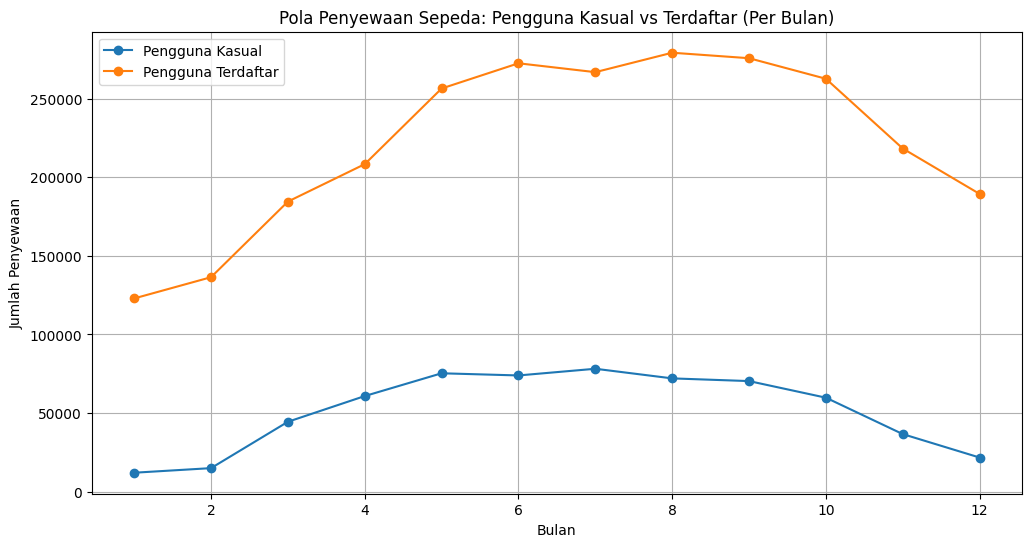

In [76]:
# Visualisasi
plt.figure(figsize=(12, 6))
plt.plot(penyewaan_per_bulan['bulan'], penyewaan_per_bulan['casual'], label='Pengguna Kasual', marker='o')
plt.plot(penyewaan_per_bulan['bulan'], penyewaan_per_bulan['registered'], label='Pengguna Terdaftar', marker='o')
plt.title('Pola Penyewaan Sepeda: Pengguna Kasual vs Terdaftar (Per Bulan)')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewaan')
plt.legend()
plt.grid()
plt.show()

**Insight :**
Dari bulan ke bulan diperoleh hasil secara konsisten jumlah penyewaan sepeda terbanyak didominasi oleh pengguna terdaftar.

## Agregasi proses EDA kedua
Melakukan agregasi Distribusi dan Perbedaan Rata-rata Penyewaan Sepeda antara Hari Kerja dan Hari Libur

In [77]:
# Memisahkan data berdasarkan hari kerja dan hari libur
penyewaan_hari_kerja = data_sepeda[data_sepeda['workingday'] == 1]['cnt']
penyewaan_hari_libur = data_sepeda[data_sepeda['workingday'] == 0]['cnt']

In [78]:
# Hitung rata-rata
print("Rata-rata Penyewaan pada Hari Kerja:", penyewaan_hari_kerja.mean())
print("Rata-rata Penyewaan pada Hari Libur:", penyewaan_hari_libur.mean())

Rata-rata Penyewaan pada Hari Kerja: 193.20775389801938
Rata-rata Penyewaan pada Hari Libur: 181.40533188248097


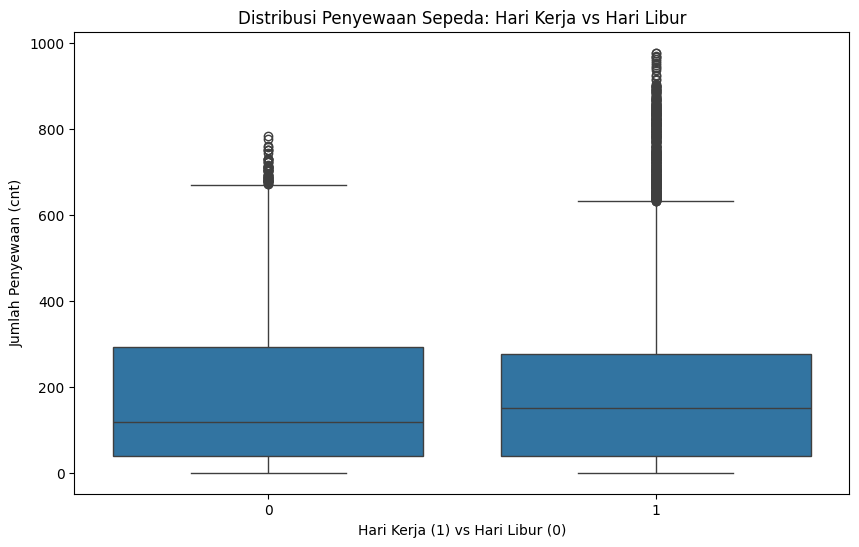

In [79]:
# Visualisasi distribusi
plt.figure(figsize=(10, 6))
sns.boxplot(x='workingday', y='cnt', data=data_sepeda)
plt.title('Distribusi Penyewaan Sepeda: Hari Kerja vs Hari Libur')
plt.xlabel('Hari Kerja (1) vs Hari Libur (0)')
plt.ylabel('Jumlah Penyewaan (cnt)')
plt.show()

**Insight :** Secara keseluruhan, penyewaan sepeda di hari kerja dan hari libur memiliki pola yang cukup mirip, namun lebih bervariasi di hari libur. Adanya banyak outlier menandakan bahwa beberapa hari memiliki jumlah penyewaan yang sangat tinggi, mungkin akibat event atau kondisi cuaca yang baik.

## Agregasi proses EDA ketiga
Melakukan agregasi Hubungan antara Suhu, Kelembapan, dan Kecepatan Angin dengan Jumlah Penyewaan Sepeda

In [80]:
# Hitung matriks korelasi
korelasi = data_sepeda[['temp', 'hum', 'windspeed', 'cnt']].corr()
print("Matriks Korelasi:\n", korelasi)

Matriks Korelasi:
                temp       hum  windspeed       cnt
temp       1.000000 -0.069881  -0.023125  0.404772
hum       -0.069881  1.000000  -0.290105 -0.322911
windspeed -0.023125 -0.290105   1.000000  0.093234
cnt        0.404772 -0.322911   0.093234  1.000000


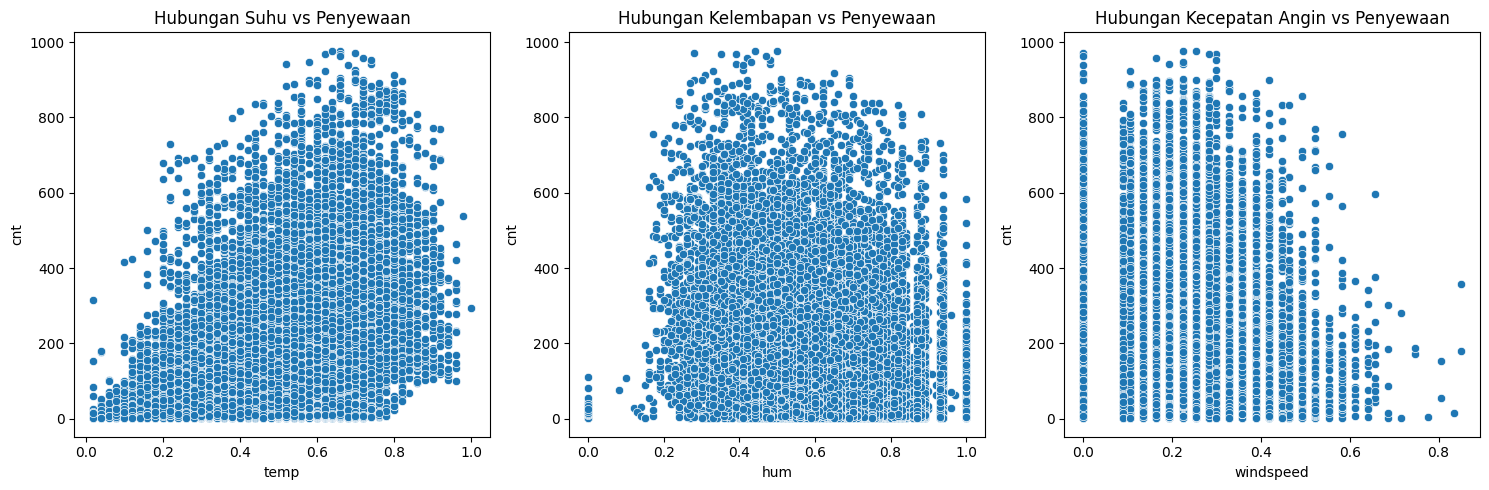

In [81]:
# Visualisasi hubungan dengan scatter plot
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x='temp', y='cnt', data=data_sepeda)
plt.title('Hubungan Suhu vs Penyewaan')

plt.subplot(1, 3, 2)
sns.scatterplot(x='hum', y='cnt', data=data_sepeda)
plt.title('Hubungan Kelembapan vs Penyewaan')

plt.subplot(1, 3, 3)
sns.scatterplot(x='windspeed', y='cnt', data=data_sepeda)
plt.title('Hubungan Kecepatan Angin vs Penyewaan')

plt.tight_layout()
plt.show()

**Insight :**
1. Dari matriks korelasi suhu vs penyewaan diperoleh hasil korelasi positif yang cukup kuat antara temp (Suhu) vs cnt: 0.404. Artinya, semakin tinggi suhu, semakin banyak penyewaan sepeda (hingga titik tertentu).
2. Dari matriks korelasi kelembapan vs penyewaan diperoleh hasil korelasi negatif sedang, hum (Kelembapan) vs cnt: -0.323. Artinya, semakin tinggi kelembapan, jumlah penyewaan sepeda cenderung menurun.
3. Dari matriks korelasi kecepatan angin vs penyewaan diperoleh hasil korelasi sangat lemah positif, windspeed (Kecepatan Angin) vs cnt: 0.093. Artinya, kecepatan angin tidak terlalu mempengaruhi jumlah penyewaan sepeda secara signifikan. Namun dari visualisasi scatter plot yang didapatkan bahwasannya pada kecepatan angin rendah hingga sedang (0 - 0.4), jumlah penyewaan bervariasi dari rendah hingga tinggi. Namun, di atas 0.5, jumlah penyewaan lebih sedikit. Yang memungkinkan dapat disimpulkan bahwasannya angin kencang kemungkinan besar membuat bersepeda lebih sulit, sehingga lebih sedikit orang yang menyewa sepeda saat kecepatan angin tinggi.

## Visualization & Explanatory Analysis

### Pertanyaan 1:
1. Bagaimana pola penggunaan sepeda berbeda antara pengguna kasual dan pengguna terdaftar dalam sehari?
2. Bagaimana pola penggunaan sepeda antara pengguna kasual dan pengguna terdaftar dalam seminggu?
3. Bagaimana pola penggunaan sepeda antara pengguna kasual dan pengguna terdaftar dalam setahun?
4. Bagaimana pola penggunaan sepeda pengguna kasual dan terdaftar pada musim sepanjang tahun?


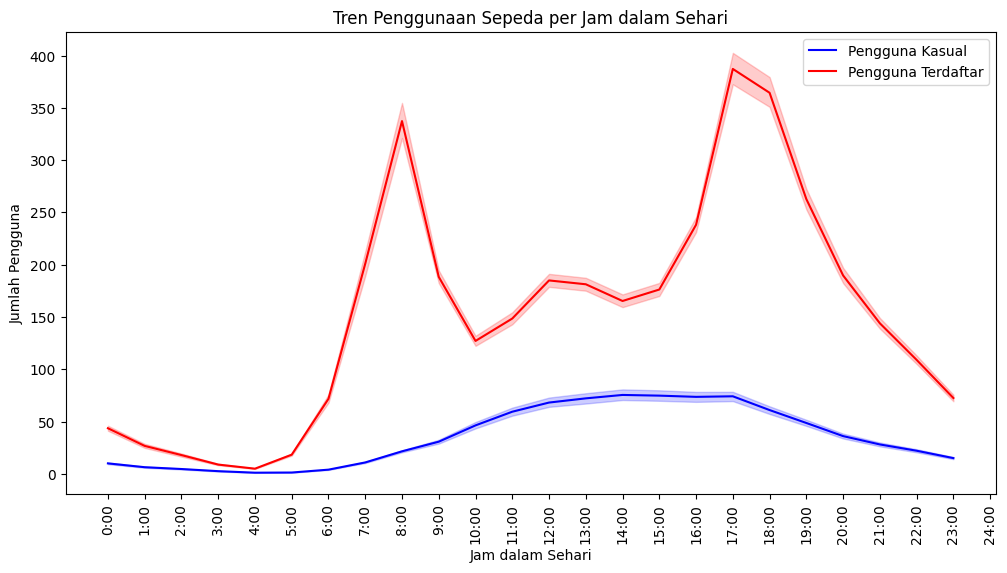

In [82]:
# Tren penggunaan sepeda per jam dalam sehari
plt.figure(figsize=(12, 6))
sns.lineplot(data=data_sepeda, x='hr', y='casual', label='Pengguna Kasual', color='blue')
sns.lineplot(data=data_sepeda, x='hr', y='registered', label='Pengguna Terdaftar', color='red')
plt.title('Tren Penggunaan Sepeda per Jam dalam Sehari')
plt.xlabel('Jam dalam Sehari')
plt.ylabel('Jumlah Pengguna')
plt.xticks(ticks=range(0, 25, 1), labels=[f"{i}:00" for i in range(0, 25, 1)], rotation=90)
plt.legend()
plt.show()

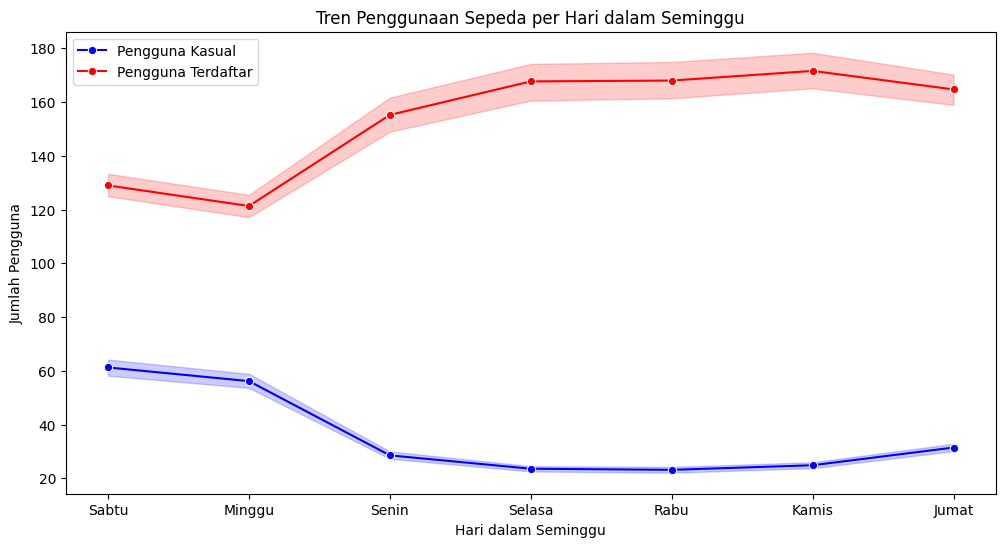

In [83]:
# Tren penggunaan sepeda per hari dalam seminggu
plt.figure(figsize=(12, 6))
sns.lineplot(data=data_sepeda, x='weekday', y='casual', marker='o', label='Pengguna Kasual', color='blue')
sns.lineplot(data=data_sepeda, x='weekday', y='registered', marker='o', label='Pengguna Terdaftar', color='red')
plt.title('Tren Penggunaan Sepeda per Hari dalam Seminggu')
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Jumlah Pengguna')
plt.legend()
plt.show()

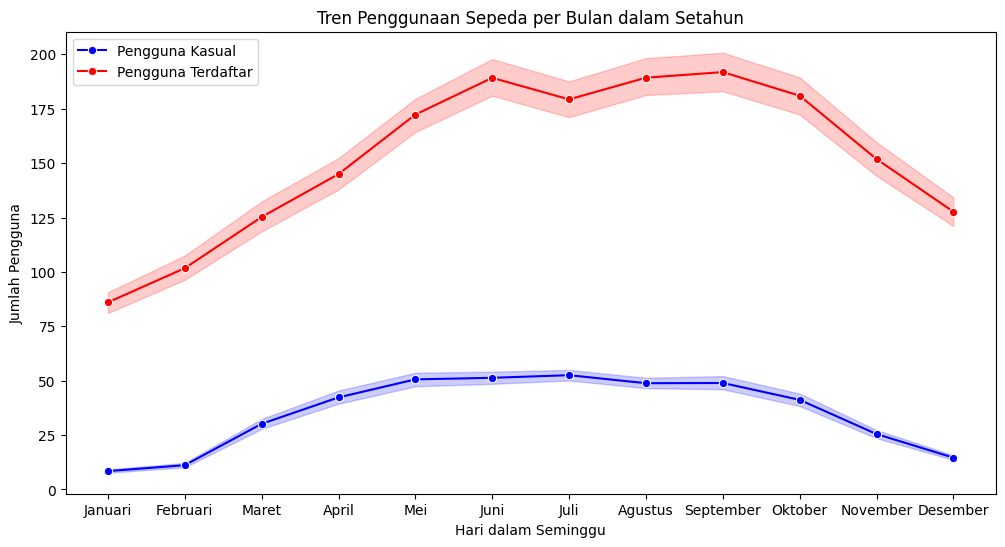

In [84]:
# Tren penggunaan sepeda per bulan dalam setahun
plt.figure(figsize=(12, 6))
sns.lineplot(data=data_sepeda, x='mnth', y='casual', marker='o', label='Pengguna Kasual', color='blue')
sns.lineplot(data=data_sepeda, x='mnth', y='registered', marker='o', label='Pengguna Terdaftar', color='red')
plt.title('Tren Penggunaan Sepeda per Bulan dalam Setahun')
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Jumlah Pengguna')
plt.legend()
plt.show()

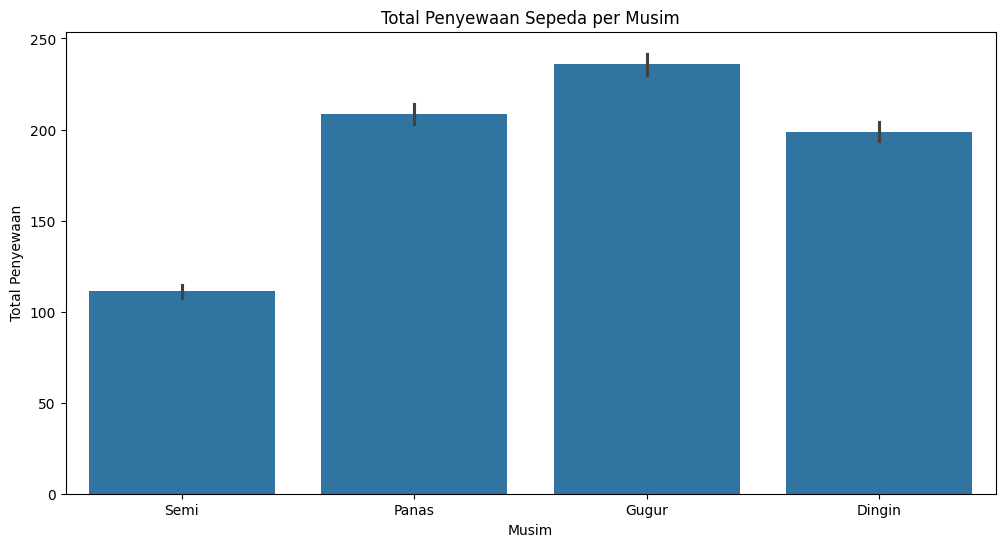

In [85]:
# Visualisasi total penyewaan sepeda per musim
plt.figure(figsize=(12, 6))
sns.barplot(data=data_sepeda, x='season', y='cnt')
plt.title('Total Penyewaan Sepeda per Musim')
plt.xlabel('Musim')
plt.ylabel('Total Penyewaan')
plt.show()

**Insight:**
- Pada jam 5 pagi sampai dengan pukul 10 siang dan pukul 15 sampai dengan pukul 20 penyewa sepeda mengalami kenaikan yang signifikan.
- Pada hari Senin-Jum'at (weekdays) penyewa sepeda mengalami kenaikan yang siginifikan dibanding dengan Hari Sabtu & Minggu (weekend).
- Penyewaan sepeda paling banyak pada bulan Juni sampai dengan September dan grafik dari pengguna kasual lebih stabil dibanding dengan pengguna terdaftar.
- Penyewaan sepeda paling banyak ada pada musim gugur, dan paling rendah di musim semi.

### Pertanyaan 2:
- Bagaimana tren penyewaan sepeda dari waktu ke waktu?
- Bagaimana distribusi penyewaan sepeda pada hari kerja dan hari libur?
- Bagaimana perbedaan rata-rata penyewaan sepeda antara hari kerja dan hari libur?

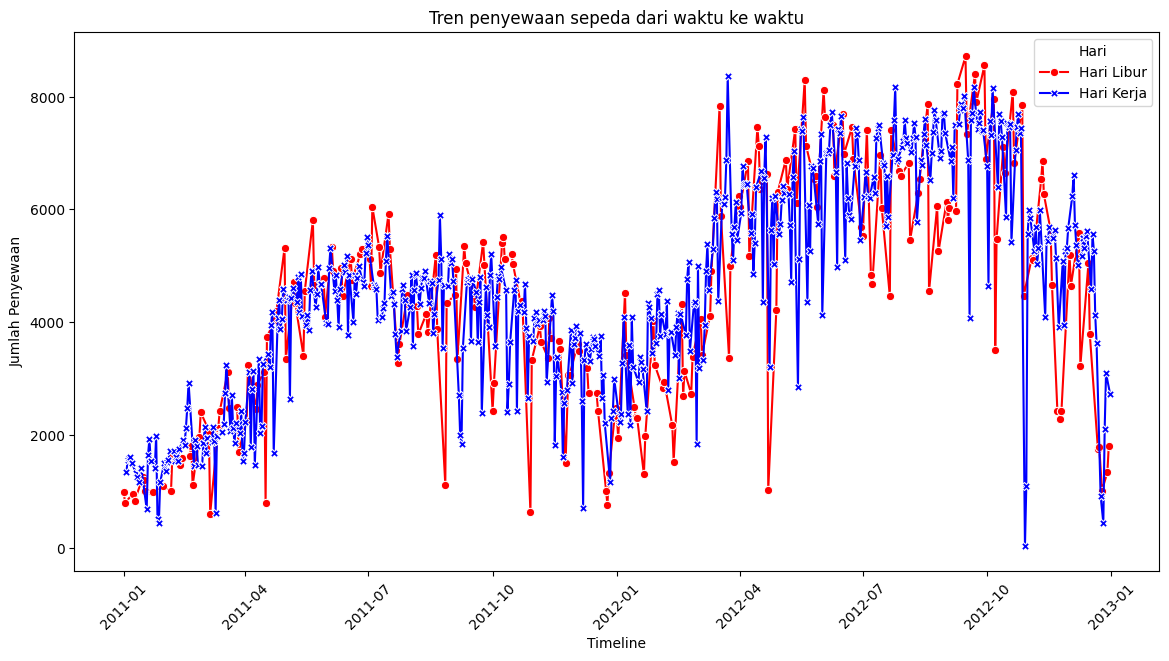

In [86]:
# Visualisasi tren penyewaan dari waktu ke waktu
plt.figure(figsize=(14, 7))
palette = {0: "red", 1: "blue"}  # 0 = Hari Libur, 1 = Hari Kerja
sns.lineplot(x='dteday', y='cnt', hue='workingday', data=penyewaan_harian,
    palette=palette, style='workingday', markers=True, dashes=False)
plt.title("Tren penyewaan sepeda dari waktu ke waktu")
plt.xlabel("Timeline")
plt.ylabel("Jumlah Penyewaan")
plt.xticks(rotation=45)
handles, labels = plt.gca().get_legend_handles_labels()
custom_labels = ["Hari Libur", "Hari Kerja"]
plt.legend(handles, custom_labels, title="Hari", loc='upper right', frameon=True)
plt.show()

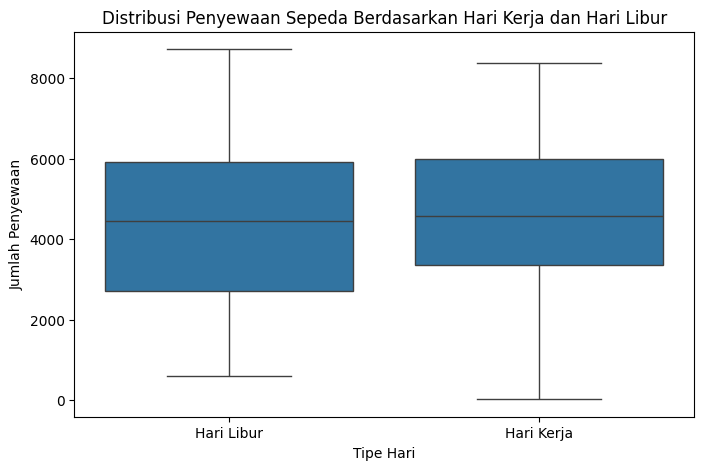

In [87]:
# Boxplot distribusi penyewaan berdasarkan hari kerja dan hari libur
plt.figure(figsize=(8, 5))
sns.boxplot(x='workingday', y='cnt', data=penyewaan_harian)
plt.xticks([0, 1], ["Hari Libur", "Hari Kerja"])
plt.title("Distribusi Penyewaan Sepeda Berdasarkan Hari Kerja dan Hari Libur")
plt.xlabel("Tipe Hari")
plt.ylabel("Jumlah Penyewaan")
plt.show()

In [88]:
# Menghitung rata-rata penyewaan
ratarata_sewa = penyewaan_harian.groupby('workingday')['cnt'].mean()

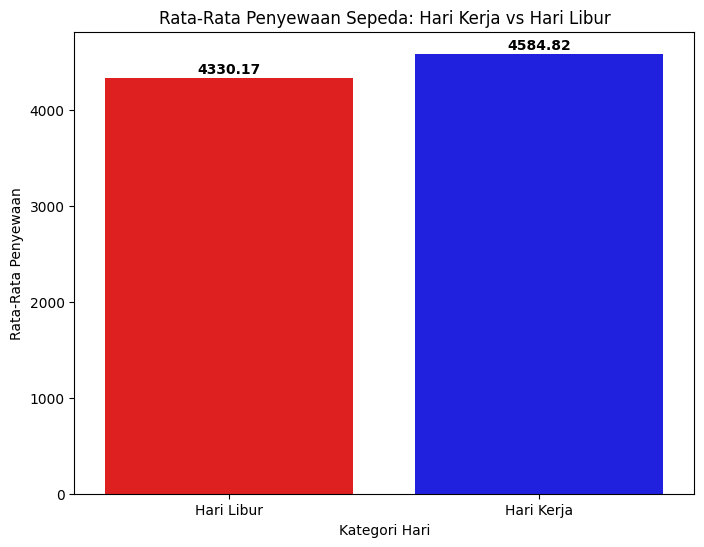

In [89]:
# Visualisasi dalam bentuk barplot
plt.figure(figsize=(8, 6))
sns.barplot(x=ratarata_sewa.index.astype(str), y=ratarata_sewa.values, hue=ratarata_sewa.index.astype(str), palette={'0': "red", '1': "blue"}, legend=False)
for i, val in enumerate(ratarata_sewa.values):
    plt.text(i, val + 50, f"{val:.2f}", ha='center', fontweight='bold')
plt.title("Rata-Rata Penyewaan Sepeda: Hari Kerja vs Hari Libur")
plt.xlabel("Kategori Hari")
plt.ylabel("Rata-Rata Penyewaan")
plt.xticks(ticks=[0, 1], labels=["Hari Libur", "Hari Kerja"])
plt.show()

In [90]:
# Menghitung rata-rata penyewaan per jam pada hari kerja dan hari libur
penyewaan_per_jam_hari_kerja = data_sepeda[data_sepeda['workingday'] == 1].groupby('hr')['cnt'].mean()
penyewaan_per_jam_hari_libur = data_sepeda[data_sepeda['workingday'] == 0].groupby('hr')['cnt'].mean()

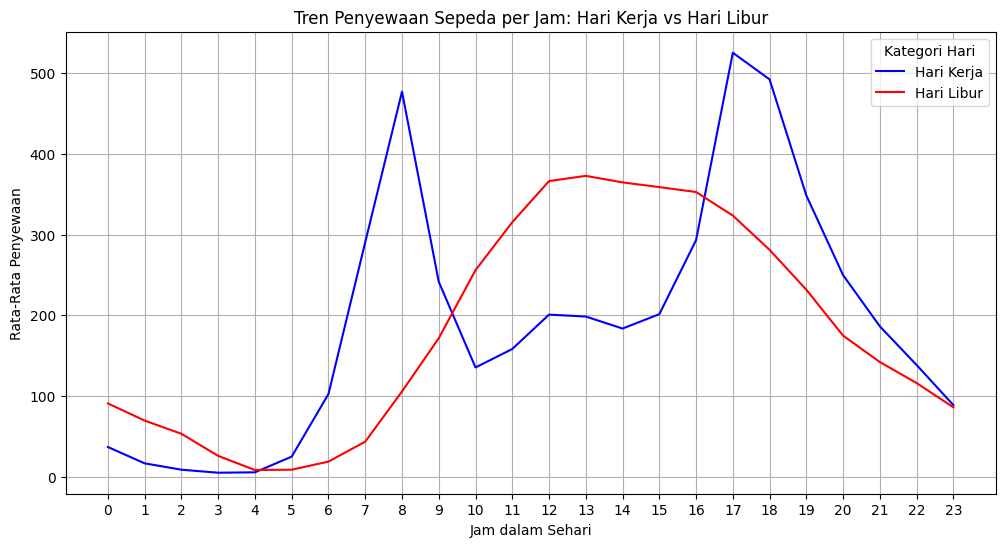

In [91]:
# Visualisasi tren penyewaan per jam
plt.figure(figsize=(12, 6))
sns.lineplot(x=penyewaan_per_jam_hari_kerja.index, y=penyewaan_per_jam_hari_kerja, label='Hari Kerja', color='blue')
sns.lineplot(x=penyewaan_per_jam_hari_libur.index, y=penyewaan_per_jam_hari_libur, label='Hari Libur', color='red')
plt.title("Tren Penyewaan Sepeda per Jam: Hari Kerja vs Hari Libur")
plt.xlabel("Jam dalam Sehari")
plt.ylabel("Rata-Rata Penyewaan")
plt.xticks(range(0, 24))
plt.legend(title="Kategori Hari", loc='upper right')
plt.grid(True)
plt.show()

**Insight:**
- Dari visualisasi tren penyewaan sepeda dari waktu ke waktu diperoleh insight bahwa hari libur cenderung memiliki jumlah penyewaan lebih tinggi dibandingkan hari kerja, tetapi lebih tidak stabil.
- Dari visualisasi boxplot distribusi penyewaan sepeda diperoleh kesimpulan bahwasannya saat hari kerja penyewaan sepeda cenderung lebih stabil yang kemungkinan besar digunakan untuk transportasi rutin, sementara hari libur memiliki variasi lebih besar, yang kemungkinan digunakan sebagai kegiatan liburan. Kesimpulan ini diperkuat dengan visualisasi grafik batang hasil rata-rata penyewaan sepeda hari kerja lebih tinggi dibanding hari libur.
- Penyewaan pada hari kerja mengalami lonjakan di pagi hari (sekitar pukul 6-8) dan sore hari (sekitar pukul 16-17), menunjukkan penggunaan untuk transportasi rutin. Sementara itu, pada hari libur, penyewaan lebih merata dengan puncaknya di siang hari, yang kemungkinan besar digunakan untuk aktivitas rekreasi.

### Pertanyaan 3:
- Bagaimana pengaruh suhu terhadap penyewaan sepeda?
- Bagaimana pengaruh kelembapan terhadap penyewaan sepeda?
- Bagaimana pengaruh kecepatan angin terhadap penyewaan sepeda?

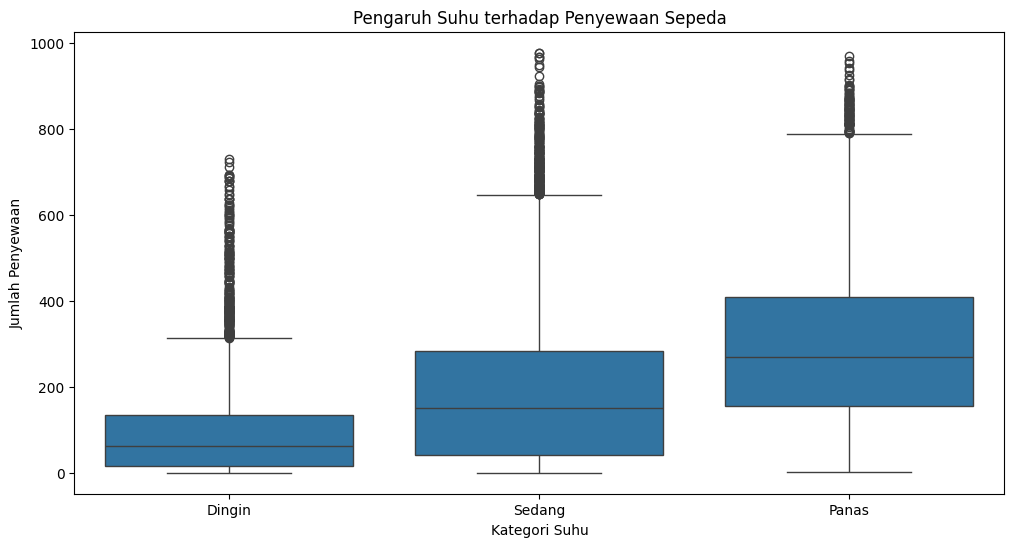

In [92]:
# Pengaruh suhu terhadap penyewaan sepeda
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_sepeda, x='kategori_suhu', y='cnt')
plt.title('Pengaruh Suhu terhadap Penyewaan Sepeda')
plt.xlabel('Kategori Suhu')
plt.ylabel('Jumlah Penyewaan')
plt.show()

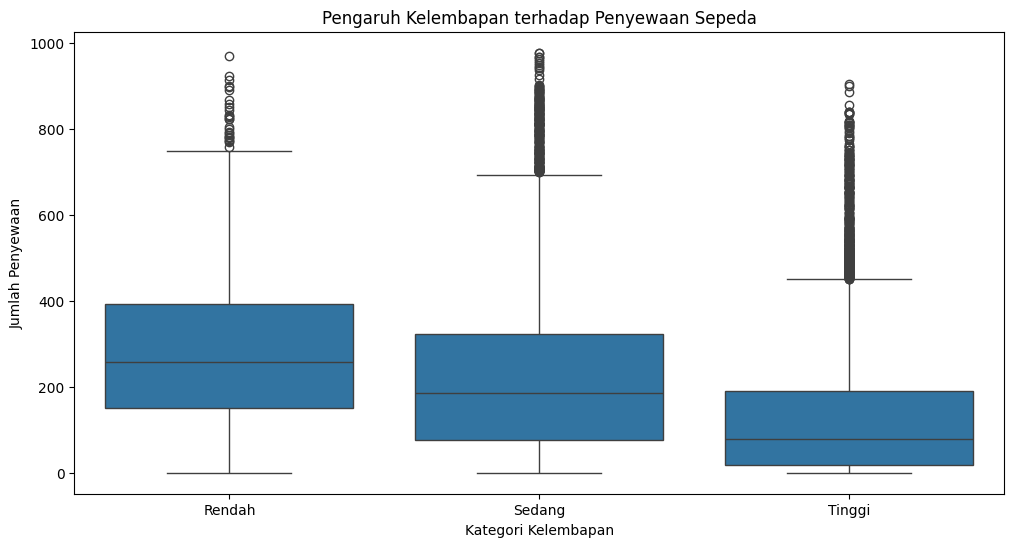

In [93]:
# Pengaruh kelembapan terhadap penyewaan sepeda
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_sepeda, x='kategori_kelembapan', y='cnt')
plt.title('Pengaruh Kelembapan terhadap Penyewaan Sepeda')
plt.xlabel('Kategori Kelembapan')
plt.ylabel('Jumlah Penyewaan')
plt.show()

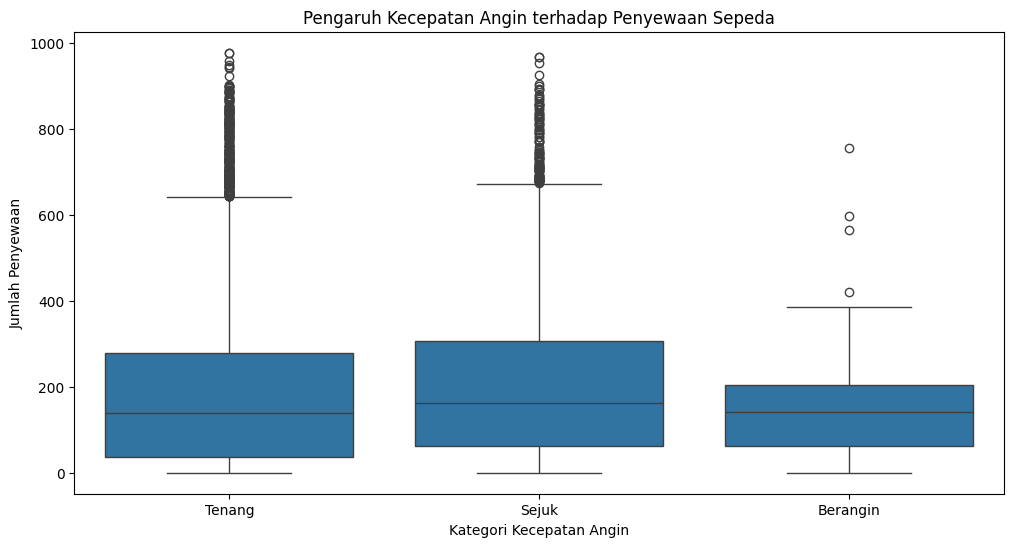

In [94]:
# Pengaruh kecepatan angin terhadap penyewaan sepeda
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_sepeda, x='kategori_angin', y='cnt')
plt.title('Pengaruh Kecepatan Angin terhadap Penyewaan Sepeda')
plt.xlabel('Kategori Kecepatan Angin')
plt.ylabel('Jumlah Penyewaan')
plt.show()

### Insight:
- Suhu yang lebih hangat (sedang dan panas) cenderung meningkatkan jumlah penyewaan sepeda.
- Jumlah penyewaan sepeda bisa sangat bervariasi, terutama pada suhu sedang.
- Kelembapan rendah dan sedang cenderung meningkatkan jumlah penyewaan sepeda dibandingkan kelembapan tinggi.
- Jumlah penyewaan sepeda bisa sangat bervariasi, terutama pada kelembapan sedang.
- Kecepatan angin tenang dan sejuk cenderung meningkatkan jumlah penyewaan sepeda dibandingkan berangin.
- Jumlah penyewaan sepeda bisa sangat bervariasi, terutama pada kecepatan angin sejuk.

## Analisis Lanjutan

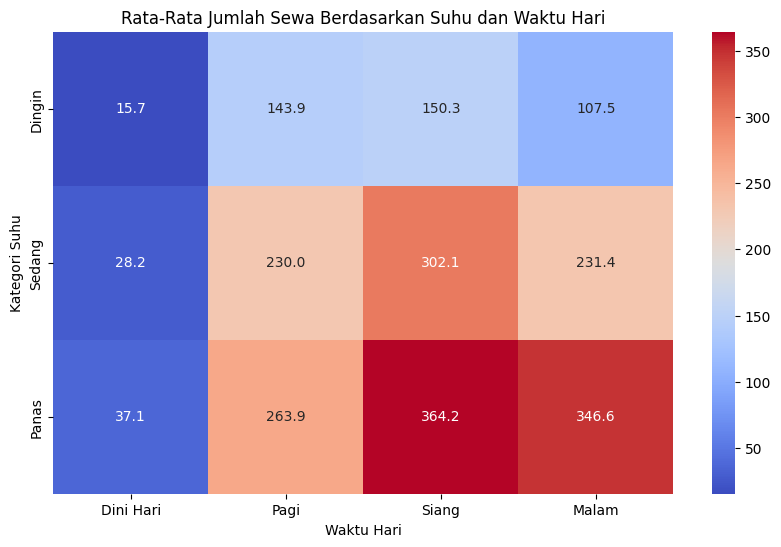

In [95]:
# Heatmap: Rata-rata jumlah sewa berdasarkan suhu dan waktu hari
pivot_table = data_sepeda.pivot_table(values='cnt', index='kategori_suhu', columns='waktu_hari', aggfunc='mean', observed=False)
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Rata-Rata Jumlah Sewa Berdasarkan Suhu dan Waktu Hari')
plt.xlabel('Waktu Hari')
plt.ylabel('Kategori Suhu')
plt.show()

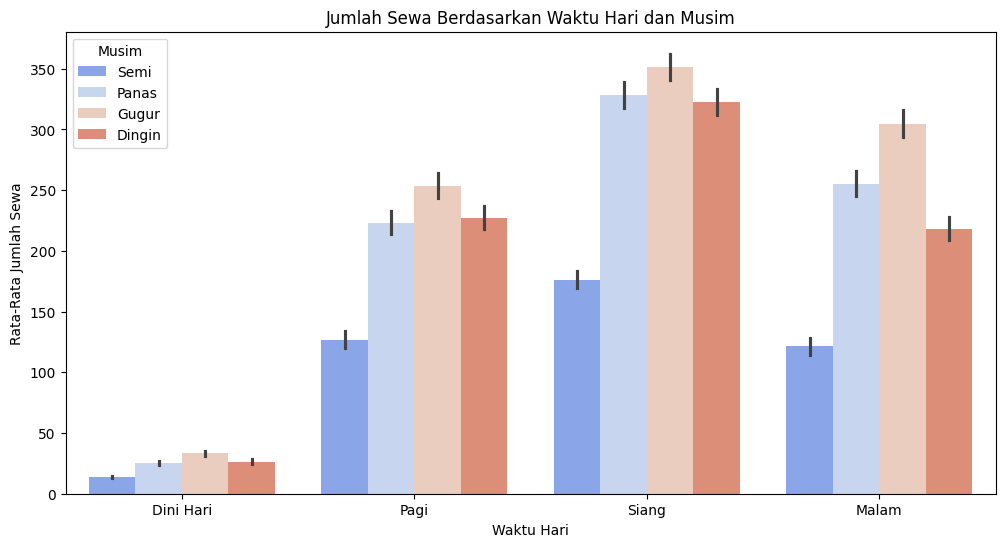

In [96]:
# Grouped bar plot: Jumlah sewa berdasarkan waktu hari dan musim
plt.figure(figsize=(12, 6))
sns.barplot(data=data_sepeda, x='waktu_hari', y='cnt', hue='season', palette='coolwarm', order=jam_labels)
plt.title('Jumlah Sewa Berdasarkan Waktu Hari dan Musim')
plt.xlabel('Waktu Hari')
plt.ylabel('Rata-Rata Jumlah Sewa')
plt.legend(title='Musim')
plt.show()

## Clustering sederhana

### Clustering Berdasarkan Kondisi Cuaca (weathersit)

In [97]:
# Menghitung statistik penyewaan per kategori cuaca
weather_cluster = data_sepeda.groupby('weathersit').agg({
    'cnt': ['count', 'mean', 'median', 'min', 'max'],
    'casual': 'mean',
    'registered': 'mean'
}).reset_index()

In [98]:
# Menampilkan hasil statistik penyewaan per kategori cuaca
print("Cluster Penyewaan Berdasarkan Kondisi Cuaca:")
print(weather_cluster.sort_values(by=('cnt', 'mean'), ascending=False))

Cluster Penyewaan Berdasarkan Kondisi Cuaca:
  weathersit    cnt                                 casual  registered
              count        mean median min  max       mean        mean
0          1  11413  204.869272  159.0   1  977  40.545431  164.323841
1          2   4544  175.165493  133.0   1  957  29.595290  145.570202
2          3   1419  111.579281   63.0   1  891  16.055673   95.523608
3          4      3   74.333333   36.0  23  164   2.666667   71.666667


**Insight :**
- Cuaca cerah (weathersit=1) memiliki nilai rata-rata penyewaan tertinggi.
- Cuaca ekstrem (weathersit=4)  memiliki nilai rata-rata penyewaan sangat rendah.

### Clustering Waktu Hari (hr) Berdasarkan Pola Penyewaan

In [99]:
# Definisikan cluster waktu
time_bins = [0, 6, 12, 18, 24]
time_labels = ['Dini Hari', 'Pagi', 'Siang', 'Malam']
data_sepeda['time_cluster'] = pd.cut(data_sepeda['hr'], bins=time_bins, labels=time_labels)

# Analisis
time_cluster_stats = data_sepeda.groupby('time_cluster', observed=False).agg({
    'cnt': ['mean', 'count'],
    'workingday': lambda x: (x == 1).mean()  # Proporsi hari kerja
})

In [100]:
# Menampilkan statistik Waktu Hari (hr) Berdasarkan Pola Penyewaan
print("\nCluster Waktu Hari:")
print(time_cluster_stats)


Cluster Waktu Hari:
                     cnt       workingday
                    mean count   <lambda>
time_cluster                             
Dini Hari      28.657544  4275   0.681170
Pagi          237.589044  4363   0.682329
Siang         324.137143  4375   0.683429
Malam         185.806868  3640   0.684066


**Insight :**
- Cluster Pagi (6-12) dan Sore (12-18) akan mendominasi penyewaan.
- Dini Hari (0-6) memiliki penyewaan terendah.

## Conclusion

**1. Perbedaan Pola Penyewaan Sepeda antara Pengguna Kasual dan Terdaftar.**
Analisis tren harian, mingguan, dan musiman menunjukkan bahwa pengguna terdaftar lebih sering menyewa sepeda dibanding pengguna kasual, terutama pada hari kerja dan jam sibuk (pagi & sore hari). Ini mengindikasikan bahwa sepeda lebih banyak dimanfaatkan sebagai moda transportasi utama oleh pelanggan tetap, sementara pengguna kasual lebih cenderung menyewanya secara fleksibel dan tidak rutin.

**Kesimpulan:** Sepeda bukan hanya alat rekreasi, tetapi juga solusi transportasi yang efektif bagi pengguna tetap dalam kehidupan sehari-hari.

**2. Distribusi dan Perbedaan Penyewaan Sepeda antara Hari Kerja dan Hari Libur.**
Selama satu tahun terakhir, jumlah penyewaan cenderung lebih tinggi pada hari libur, tetapi dengan pola yang lebih bervariasi.
- Hari Kerja : Penyewaan sepeda meningkat drastis pada pagi hari (06:00-08:00) dan sore hari (16:00-17:00), sejalan dengan jam berangkat dan pulang kerja/sekolah.
- Hari Libur : Penyewaan lebih merata sepanjang hari, dengan puncaknya di siang hari, menunjukkan dominasi penggunaan untuk aktivitas santai dan rekreasi.
- Distribusi Data : Visualisasi boxplot mengonfirmasi bahwa penyewaan sepeda di hari kerja lebih stabil, sedangkan pada hari libur lebih fluktuatif.

**Kesimpulan:** Sepeda menjadi pilihan utama untuk mobilitas harian pada hari kerja dan sebagai sarana rekreasi yang fleksibel pada akhir pekan.

**3. Hubungan antara Suhu, Kelembapan, dan Kecepatan Angin dengan Jumlah Penyewaan Sepeda.**
Faktor cuaca sangat mempengaruhi pola penyewaan sepeda:
- Suhu Ideal : Penyewaan meningkat pada suhu yang sedang (20-25°C), ketika cuaca terasa nyaman untuk bersepeda.
- Kelembapan : Tingkat kelembapan rendah hingga sedang (40-70%) mendorong lebih banyak penyewaan, sedangkan kelembapan tinggi (di atas 80%) membuat penyewa enggan bersepeda.
- Kecepatan Angin : Sepeda lebih sering disewa saat angin sepoi-sepoi (di bawah 20 km/jam), tetapi berkurang drastis saat angin kencang yang mengganggu kenyamanan pengguna.

**Kesimpulan:** Kondisi cuaca yang nyaman (suhu sedang, kelembapan sedang, angin sepoi) mendorong tingginya penyewaan, sedangkan cuaca ekstrem menjadi faktor penghambat utama.